In [1]:
#Name:Anantharam RU SRN:PES102700088
#Name:Kirthika Gurumurthy SRN:PES1201700230

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import nltk
# nltk.download('stopwords')
# nltk.download('inaugural')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('reuters')
from nltk import pos_tag # default tagger of nltk. pos_tag() uses the Penn Treebank Tag Set
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from nltk.corpus import inaugural
import string
import collections
from nltk import pos_tag_sents
from nltk.corpus import reuters
import operator
import re

In [3]:
#A. Extract the raw text from the latest 5 speeches
latest_5_president_speeches = []
names = inaugural.fileids()
for i in range(-1,-6,-1):
    latest_5_president_speeches.append(inaugural.raw(names[i]))

In [5]:
#Display raw text of latest 5 specches
latest_5_president_speeches[0]
latest_5_president_speeches[1]
latest_5_president_speeches[2]
latest_5_president_speeches[3]
latest_5_president_speeches[4]

'President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. With a simple oath, we affirm old traditions and make new beginnings.\n\nAs I begin, I thank President Clinton for his service to our nation. \n\nAnd I thank Vice President Gore for a contest conducted with spirit and ended with grace. \n\nI am honored and humbled to stand here, where so many of America\'s leaders have come before me, and so many will follow.\n\nWe have a place, all of us, in a long story--a story we continue, but whose end we will not see. It is the story of a new world that became a friend and liberator of the old, a story of a slave-holding society that became a servant of freedom, the story of a power that went into the world to protect but not possess, to defend but not to conquer.\n\nIt is the American story--a story of flawed and fallible people, united across the generations by grand and enduring ideals. \n\nThe gran

In [6]:
#B. Tokenize the raw text of these speeches into sentences
sentences1 = sent_tokenize(latest_5_president_speeches[0])
sentences2 = sent_tokenize(latest_5_president_speeches[1])
sentences3 = sent_tokenize(latest_5_president_speeches[2])
sentences4 = sent_tokenize(latest_5_president_speeches[3])
sentences5 = sent_tokenize(latest_5_president_speeches[4])

In [7]:
#C. Tokenize the each sentence into words
def getWords(sentences):
    words = {} #Contains list of words as value of the dictionary for each sentence where the key implies 'key+1'th sentence.
    index = 0
    for sentence in sentences:
        words[index] = (word_tokenize(sentence))
        index += 1
    return words


words1 = getWords(sentences1)
words2 = getWords(sentences2)
words3 = getWords(sentences3)
words4 = getWords(sentences4)
words5 = getWords(sentences5)

In [8]:
# D. From the tokenized sentences, generate new sentence which is the sentence formed by removing
# the stop-‐words as well as stemming each word in the sentence.
ps = PorterStemmer()
stop_words = list(stopwords.words('english'))
def getNewSentences(words):
    sentences_after_stemming_and_removing_stopwords = []
    for i in range(len(words)):
        new_sentence = ""
        for j in range(len(words[i])-1):
            if(words[i][j].lower() not in stop_words): #Checking if the word is a stopword
                if(words[i][j+1] == ":" or words[i][j+1] == ";" or words[i][j+1] == "," or words[i][j+1] == "."):
                    new_sentence += ps.stem(words[i][j]) #Stemming the words before concatenating it to the new sentence.
                else:
                    new_sentence += ps.stem(words[i][j]) + " "
        new_sentence += ps.stem(words[i][-1])
        sentences_after_stemming_and_removing_stopwords.append(new_sentence)
    return sentences_after_stemming_and_removing_stopwords

newsentences1 = getNewSentences(words1)
newsentences2 = getNewSentences(words2)
newsentences3 = getNewSentences(words3)
newsentences4 = getNewSentences(words4)
newsentences5 = getNewSentences(words5)

In [9]:
#E. Tokenize the new sentence in D into words.
def generateNewWords(sentences_after_stemming_and_removing_stopwords):
    new_words = {}
    index = 0
    for new_sentence in sentences_after_stemming_and_removing_stopwords:
        new_words[index] = word_tokenize(new_sentence)
        index += 1
    return new_words


new_words1 = generateNewWords(newsentences1)
new_words2 = generateNewWords(newsentences2)
new_words3 = generateNewWords(newsentences3)
new_words4 = generateNewWords(newsentences4)
new_words5 = generateNewWords(newsentences5)


In [10]:
#F.Make separate Word Clouds of the words in C and words in E.
#wordclouds require string as a parameter

#in this function we remove tokens containing only punctuation and convert the rewst to string to construct wordclouds

def remove_punct_converttostring(words):
    wordsList=words.values()
    allPunctuation = list(string.punctuation)
    flatList = [word for flatWord in wordsList for word in flatWord]
    punctRemoved = [word for word in flatList if word not in allPunctuation]
    #return punctRemoved
    str1 = " "
    return(str1.join(punctRemoved))

punctRemoved_words1 = remove_punct_converttostring(words1)
punctRemoved_words2 = remove_punct_converttostring(words1)
punctRemoved_words3 = remove_punct_converttostring(words1)
punctRemoved_words4 = remove_punct_converttostring(words1)
punctRemoved_words5 = remove_punct_converttostring(words1)
punctRemoved_new_words1 = remove_punct_converttostring(new_words1)
punctRemoved_new_words2 = remove_punct_converttostring(new_words2)
punctRemoved_new_words3 = remove_punct_converttostring(new_words3)
punctRemoved_new_words4 = remove_punct_converttostring(new_words4)
punctRemoved_new_words5 = remove_punct_converttostring(new_words5)

def wordcloud(text):
     wordcloud=WordCloud().generate(text)
     plt.imshow(wordcloud, interpolation='bilinear')
     plt.axis("off")


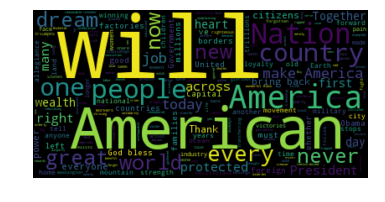

In [11]:
#Wordcloud of words in C (without stemming and stop word removal) for Speech 3
wordcloud(punctRemoved_words3)

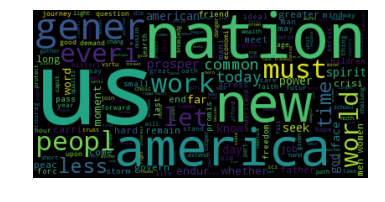

In [12]:
#Wordcloud of words in E (After stemming and stop word removal) for Speech 3
wordcloud(punctRemoved_new_words3)

In [13]:
#G.What inference can you draw from the two word clouds? Does the stemming and stop-‐word removal give you any different insight into the corpus?
'''We see that by stemming we have eliminated the use of redundant words such as various inflections of the word has been removed in the second wordcloud as it is of no use for analysis,thus
increasing the information we can gain out of the wordcloud.By removing stop words we have eliminated unnecessary common words sucha
as "will" as they provide us with no extra information .We can see in the first wordcloud that stop words such as "will" 
is shown to be significant which leads to the wordcloud not being as informative as the one constructed after stemming and stop word
removal.THese inferences can be drawn by plotting the wordclouds for the other 4 speches as well.

Clearly we get a differnt insight from the second wordcloud as opposed to the second.THe stemmed ,stop word removed word
clud depicts that the word ouccring with the highest frequencies in this speech is "nation","us" and "new".THe original 
wordcloud depicts "will" as one of the most significant words whis is of little use to us.'''

'We see that by stemming we have eliminated the use of redundant words such as various inflections of the word has been removed in the second wordcloud as it is of no use for analysis,thus\nincreasing the information we can gain out of the wordcloud.By removing stop words we have eliminated unnecessary common words sucha\nas "will" as they provide us with no extra information .We can see in the first wordcloud that stop words such as "will" \nis shown to be significant which leads to the wordcloud not being as informative as the one constructed after stemming and stop word\nremoval.THese inferences can be drawn by plotting the wordclouds for the other 4 speches as well.\n\nClearly we get a differnt insight from the second wordcloud as opposed to the second.THe stemmed ,stop word removed word\nclud depicts that the word ouccring with the highest frequencies in this speech is "nation","us" and "new".THe original \nwordcloud depicts "will" as one of the most significant words whis is of l

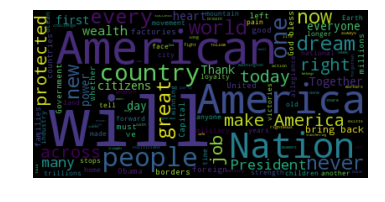

In [14]:
#Wordcloud of words in C (without stemming and stop word removal) for Speech 1
wordcloud(punctRemoved_words1)

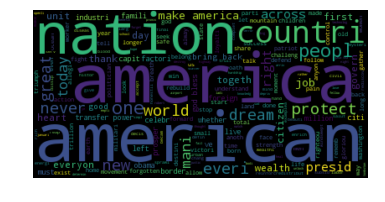

In [15]:
#Wordcloud of words in E (After stemming and stop word removal) for Speech 1
wordcloud(punctRemoved_new_words1)

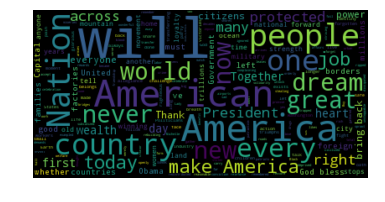

In [16]:
#Wordcloud of words in C (without stemming and stop word removal) for Speech 2
wordcloud(punctRemoved_words2)

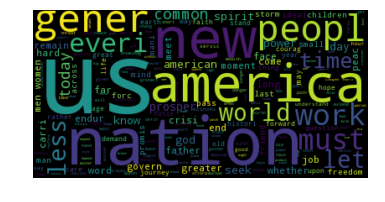

In [17]:
#Wordcloud of words in E ( after stemming and stop word removal) for Speech 2
wordcloud(punctRemoved_new_words3)

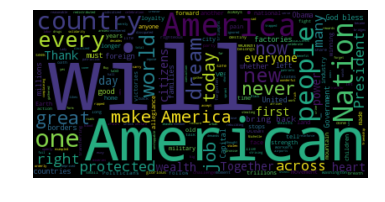

In [18]:
#Wordcloud of words in C (without stemming and stop word removal) for Speech 4
wordcloud(punctRemoved_words4)

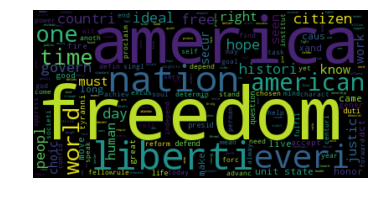

In [19]:
#Wordcloud of words in E ( after stemming and stop word removal) for Speech 4
wordcloud(punctRemoved_new_words4)

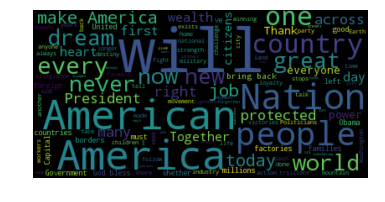

In [21]:
#Wordcloud of words in C (without stemming and stop word removal) for Speech 5
wordcloud(punctRemoved_words5)

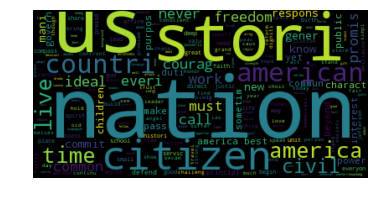

In [22]:
#Wordcloud of words in E ( after stemming and stop word removal) for Speech 5
wordcloud(punctRemoved_new_words5)

In [23]:
# H. Using POS tagging identify the frequency distribution of the different parts of speech of the
# words given in the text. (Use PennTree Tagset). Identify and represent the distribution via suitable
# visualization technique.
def getPOSTagFreq(new_words):
    new_pos = {}

    for i in range(len(new_words)):
        tags = pos_tag(new_words[i])
        for tag in tags:
            try:
                new_pos[tag[1]].append(tag[0])
            except:
                new_pos[tag[1]] = list()
                new_pos[tag[1]].append(tag[0])

    new_pos_freq = {} #Gives frequency for all the tags
    for key in new_pos.keys():
        new_pos_freq[key] = len(new_pos[key])
        
    return new_pos_freq
        
new_pos_freq1 = getPOSTagFreq(new_words1)
new_pos_freq2 = getPOSTagFreq(new_words2)
new_pos_freq3 = getPOSTagFreq(new_words3)
new_pos_freq4 = getPOSTagFreq(new_words4)
new_pos_freq5 = getPOSTagFreq(new_words5)



Text(0.5, 1.0, 'SPEECH 1')

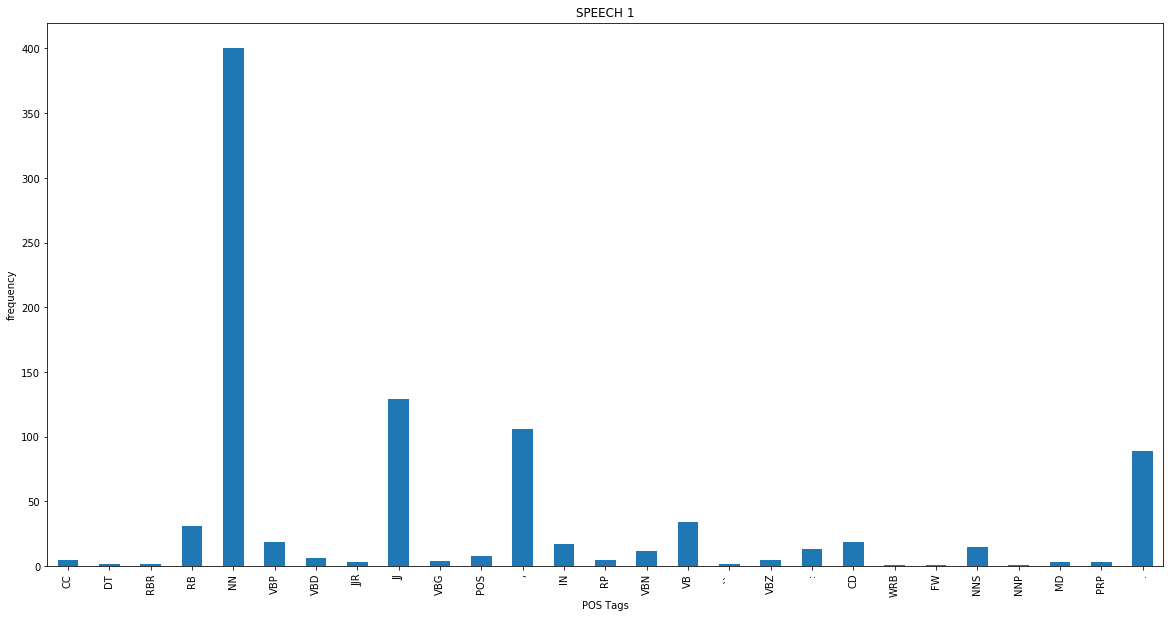

In [25]:
#distribution for spech 1
graph1 = pd.Series(list(new_pos_freq1.values()), index=list(new_pos_freq1.keys()))
graph1.plot.bar(figsize=(20,10))
plt.xlabel('POS Tags')
plt.ylabel('frequency')
plt.title("SPEECH 1")

Text(0.5, 1.0, 'SPEECH 2')

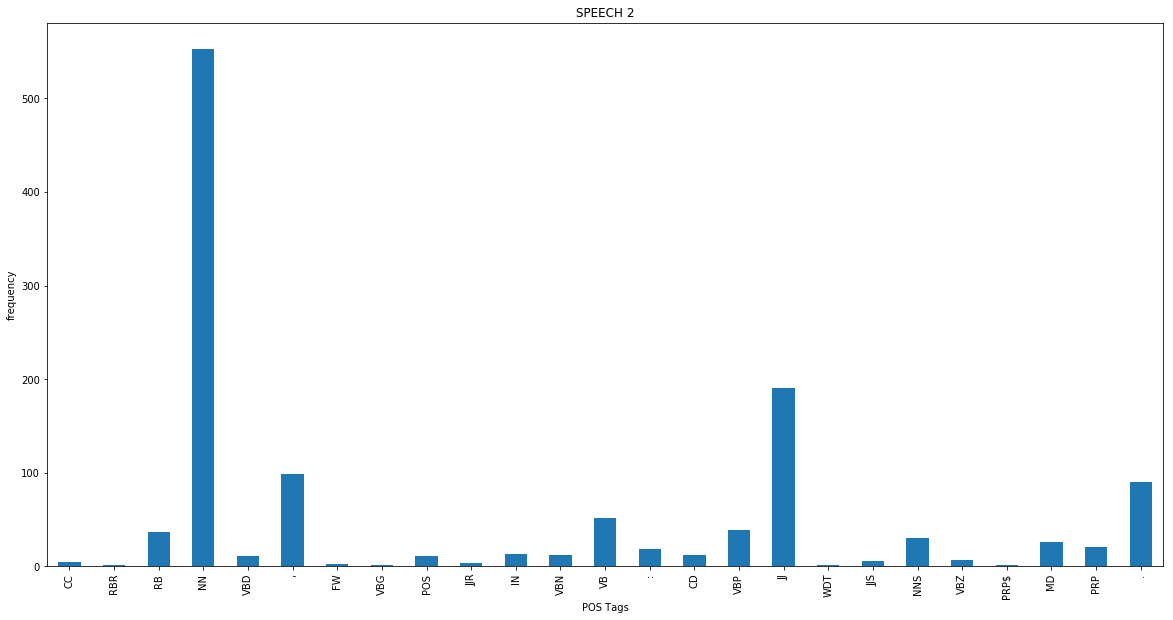

In [26]:
#distribution for speech 2
graph2 = pd.Series(list(new_pos_freq2.values()), index=list(new_pos_freq2.keys()))
graph2.plot.bar(figsize=(20,10))
plt.xlabel('POS Tags')
plt.ylabel('frequency')
plt.title("SPEECH 2")

Text(0.5, 1.0, 'SPEECH 3')

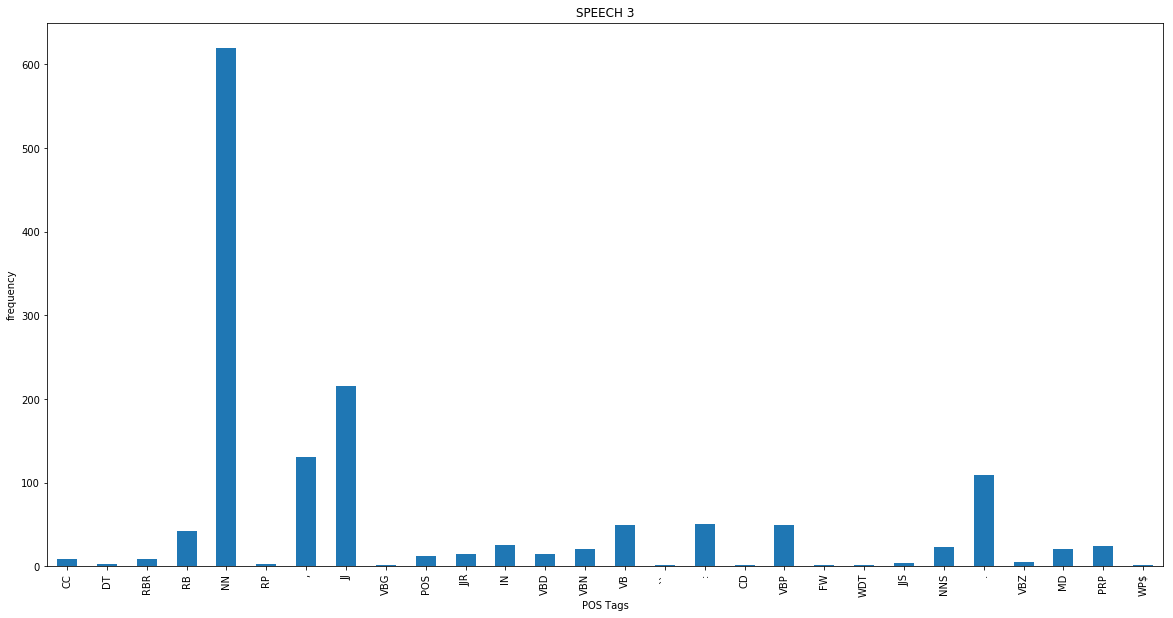

In [27]:
#distribution for speech 3
graph3 = pd.Series(list(new_pos_freq3.values()), index=list(new_pos_freq3.keys()))
graph3.plot.bar(figsize=(20,10))
plt.xlabel('POS Tags')
plt.ylabel('frequency')
plt.title("SPEECH 3")

Text(0.5, 1.0, 'SPEECH 4')

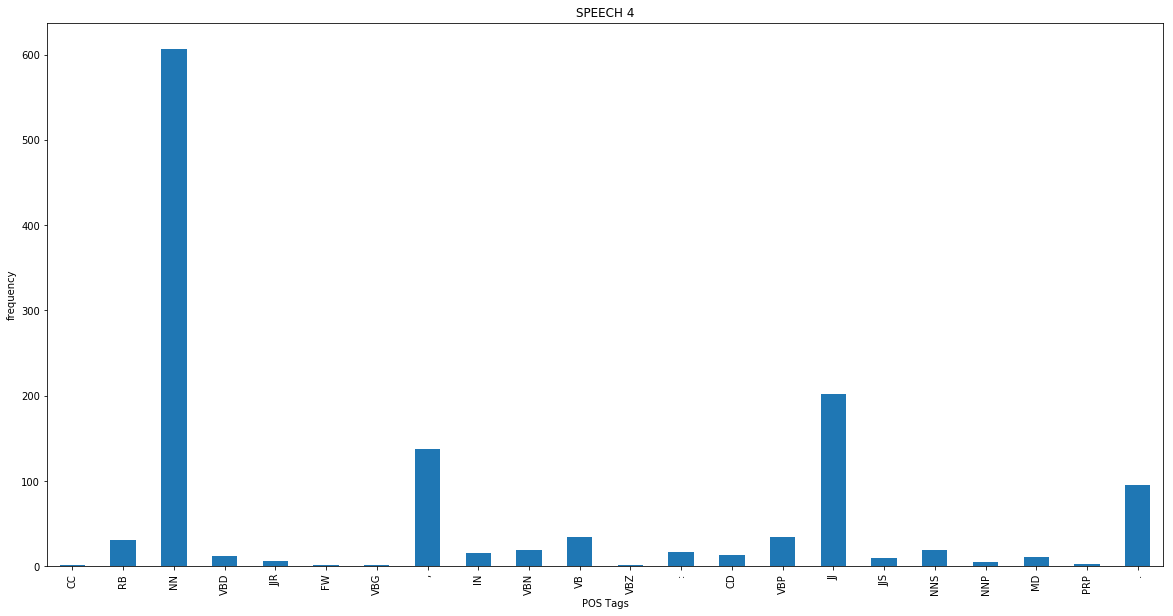

In [28]:
#distribution for speech 4
graph4 = pd.Series(list(new_pos_freq4.values()), index=list(new_pos_freq4.keys()))
graph4.plot.bar(figsize=(20,10))
plt.xlabel('POS Tags')
plt.ylabel('frequency')
plt.title("SPEECH 4")

Text(0.5, 1.0, 'SPEECH 5')

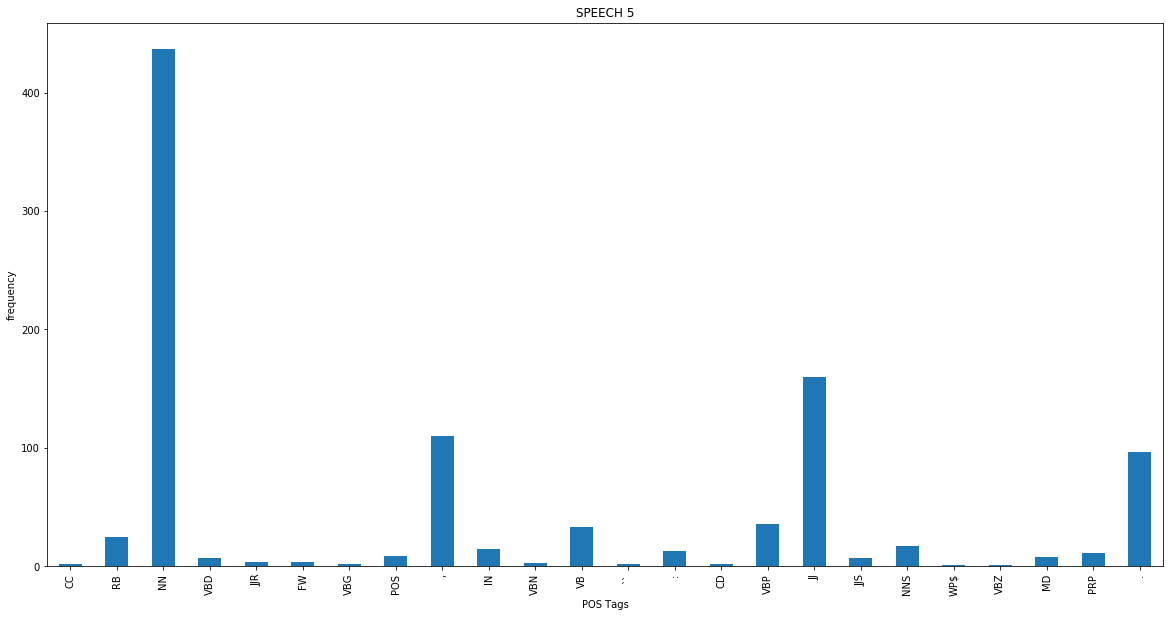

In [29]:
#distribution for speech 5

graph5 = pd.Series(list(new_pos_freq5.values()), index=list(new_pos_freq5.keys()))
graph5.plot.bar(figsize=(20,10))
plt.xlabel('POS Tags')
plt.ylabel('frequency')
plt.title("SPEECH 5")

In [31]:
# I. Each sentence can be scored as the sum of frequencies of individual words (excluding stop
# words). Identify the top 5 sentences based on this score.

#the score is calculated using term frequency 
def getTop5Sentences(speech,words,sentences):
    all_words_excluding_stopwords_in_the_speech = [] #contains words that are not stemmed
    for word in word_tokenize(speech):
        if(word.lower() not in stop_words):
            all_words_excluding_stopwords_in_the_speech.append(word)

    total_words = len(all_words_excluding_stopwords_in_the_speech)

    sentence_score = {}
    for i in range(len(words)): # words list contains words that are not stemmed and contains stop words but it won't affect the answer as the list 'all_words_excluding_stopwords_in_the_speech' doesn't contain stop words.
        summ = 0
        for word in words[i]:
            summ += all_words_excluding_stopwords_in_the_speech.count(word)
        score = summ/total_words
        sentence_score[i] = score
   
    sorted_sentences_based_on_score = sorted(sentence_score.items(), key = lambda kv:(kv[1], kv[0]))
#     print(sorted_sentences_based_on_score)
#     print()
    top5sentences = []
    for i in range(-1,-6,-1):
        top5sentences.append(sentences[sorted_sentences_based_on_score[i][0]])
    return top5sentences

latestSpeechTop5 = getTop5Sentences(latest_5_president_speeches[0],words1,sentences1)
secondLatestSpeechTop5 = getTop5Sentences(latest_5_president_speeches[1],words2,sentences2)
thirdLatestSpeechTop5 = getTop5Sentences(latest_5_president_speeches[2],words3,sentences3)
fourthLatestSpeechTop5 = getTop5Sentences(latest_5_president_speeches[3],words4,sentences4)
fifthLatestSpeechTop5 = getTop5Sentences(latest_5_president_speeches[4],words5,sentences5)
'''These contain the top 5 sentences for the 5 speeches'''

'''The top 5 sentences of each speech are printed below'''

'The top 5 sentences of each speech are printed below'

In [32]:
print(latestSpeechTop5)
print()
print(secondLatestSpeechTop5)
print()
print(thirdLatestSpeechTop5)
print()
print(fourthLatestSpeechTop5)
print()
print(fifthLatestSpeechTop5)

['Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.', 'We stand at the birth of a new millennium, ready to unlock the mysteries of space, to free the Earth from the miseries of disease, and to harness the energies, industries, and technologies of tomorrow.', 'Because today we are not merely transferring power from one administration to another or from one party to another, but we are transferring power from Washington, DC, and giving it back to you, the people.', 'So to all Americans in every city near and far, small and large, from mountain to mountain, from ocean to ocean, hear these words: You will never be ignored again.', 'Every decision on trade, on taxes, on immigration, on foreign affairs, will be made to benefit American workers and American families.']

['We, the people, declare today that the most evident of truthsâ\x80\x94that all of us are created equalâ\x80\x94is the star that

In [33]:
#J. With the help of regular expressions, extract the words in E that have either numbers or other
#non-‐alphabetic characters.

def non_alphabetic(words):
    wordList=words.values()
    new_str=' '.join([str(elem) for elem in wordList])
    regex=re.compile('[a-zA-Z]')
    result=regex.sub('',new_str)
    return result

nonalpha1=non_alphabetic(new_words1)
nonalpha1

'[\'\', \'\', \'\', \',\', \'\', \'\', \',\', \'\', \'\', \',\', \'\', \'\', \',\', \'\', \'\', \',\', \'\', \'\', \',\', \'\', \'\', \':\', \'\', \'.\'] [\',\', \'\', \'\', \',\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'.\'] [\'\', \',\', \'\', \'\', \'\', \'\', \'\', \',\', \'\', \'\', \'\', \'.\'] [\'\', \'\', \',\', \'\', \'\', \',\', \'\', \'\', \'\', \'.\'] [\'\', \'4\', \'\', \',\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \',\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'.\'] [\'\', \'.\'] [\'\', \'.\'] [\'\', "\'", \'\', \',\', \'\', \',\', \'\', \'\', \'.\'] [\'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'\', \',\', \'\', \'\', \'\', \',\', \'\', \',\', \'\', \'\', \',\', \'\', \'.\'] [\'\', \',\', \'\', \'\', \'\', "\'", \'\', \'\', \'\', \'\', \'\', \'\', \'\', \'.\'] [\'\', \'\', \',\', \'\', \'\', \'\', \'.\'] [\'\', \'\', \',\', \'\', \'\', \',\', \'\', \'\', \'.\'] [\'\', \'\', \',\', \'\', \'\', \'.\'] [\'\', \'\', \';

In [34]:
#Part 2
#Use TextBlob to Tag the word tokens and choose the tokens according to tags. You should install
#Python word cloud library (conda install). Note that it requires a string of words.
#Make word clouds with the followings Try to make the most well-meaning word clouds showing
#the noun word cloud vs. adjective word cloud -NOuns,Adjectives

from textblob import TextBlob
from textblob.taggers import NLTKTagger
from textblob import Word
nltk_tagger=NLTKTagger()
blob1=TextBlob(latest_5_president_speeches[0],pos_tagger=nltk_tagger)
blob2=TextBlob(latest_5_president_speeches[1],pos_tagger=nltk_tagger)
blob3=TextBlob(latest_5_president_speeches[2],pos_tagger=nltk_tagger)
blob4=TextBlob(latest_5_president_speeches[3],pos_tagger=nltk_tagger)
blob5=TextBlob(latest_5_president_speeches[4],pos_tagger=nltk_tagger)

def get_nouns(blob):
    ls=[]
    for i in range(len(blob.pos_tags)):
        if(blob.pos_tags[i][1]=='NN'):
            ls.append(blob.pos_tags[i][0])
    new_str=' '.join([str(elem) for elem in ls])
    return new_str
        
def get_adj(blob):
    ls=[]
    for i in range(len(blob.pos_tags)):
        if(blob.pos_tags[i][1]=='JJ'):
            ls.append(blob.pos_tags[i][0])
    new_str=' '.join([str(elem) for elem in ls])
    return new_str


In [35]:
blob1_noun=get_nouns(blob1)
blob2_noun=get_nouns(blob2)
blob3_noun=get_nouns(blob3)
blob4_noun=get_nouns(blob4)
blob5_noun=get_nouns(blob5)
blob1_adj=get_adj(blob1)
blob2_adj=get_adj(blob2)
blob3_adj=get_adj(blob3)
blob4_adj=get_adj(blob4)
blob5_adj=get_adj(blob5)

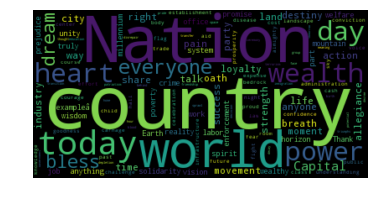

In [36]:
#wordcloud of nouns for speech 1
wordcloud(blob1_noun)

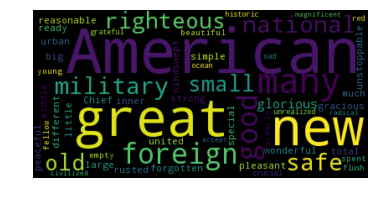

In [37]:
#wordcloud of adjectives for speech 1
wordcloud(blob1_adj)

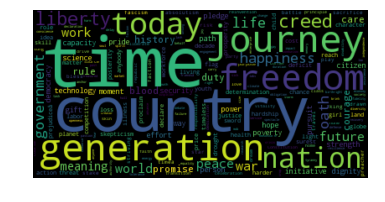

In [38]:
#wordcloud of nouns for speech 2
wordcloud(blob2_noun)

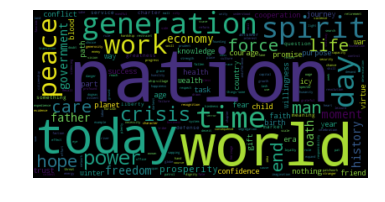

In [39]:
#wordcloud of nouns for speech 3
wordcloud(blob3_noun)

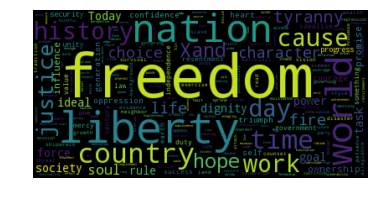

In [40]:
#wordcloud of nouns for speech 4
wordcloud(blob4_noun)

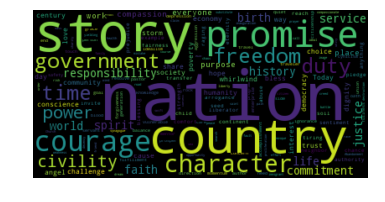

In [41]:
#wordcloud of nouns for speech 5
wordcloud(blob5_noun)

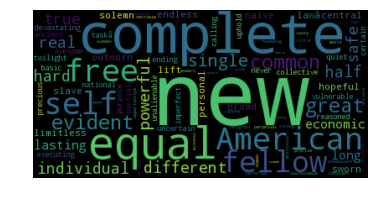

In [42]:
#wordcloud of adjectives for speech 2
wordcloud(blob2_adj)

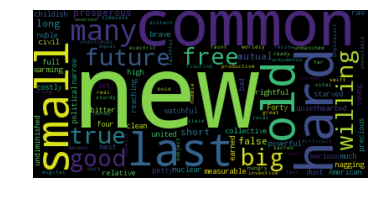

In [43]:
#wordcloud of adjectives for speech 3
wordcloud(blob3_adj)

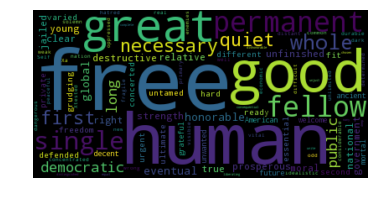

In [44]:
#wordcloud of adjectives for speech 4
wordcloud(blob4_adj)

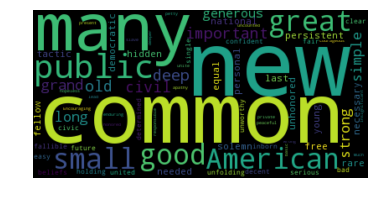

In [45]:
#wordcloud of adjectives for speech 5
wordcloud(blob5_adj)